## Visualization for JUST Embeddings using t-SNE

We will import the .embeddings file generated by running JUST, and we project the 128-dimensional vectors down to 2 dimensions using the [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

### Step 1: Loading from .embedding files into Pandas Dataframes

Pandas DataFrames are tables of data that can be created from [many input sources](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html), such as [CSV files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and [SQL databases](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File path
embeddings_file = 'JUST_Outputs/micromusic.embeddings'

# Initialize lists to store node indexes and embeddings
node_indexes = []
embeddings = []

# Process the embeddings file
with open(embeddings_file, 'r') as file:
    for line in file:
        parts = line.split(maxsplit=1)
        node_indexes.append(parts[0])
        embeddings.append([float(val) for val in parts[1].split()])

# Convert embeddings to DataFrame
embeddings_df = pd.DataFrame(embeddings)

# Assign a new index to the DataFrame
embeddings_df.index = range(1, len(embeddings_df) + 1)

# Check the first few rows of the DataFrame
print(embeddings_df.head())

embeddings_df.shape

#Remove first element from node_indexes list
node_indexes.pop(0)

print(node_indexes) 

#Extract node_indexes list and save as .txt file
# Path where the updated list will be saved
output_file_path = "JUST_Outputs/node_indexes.txt"

# Write the updated list to a file, each node index on a new line
with open(output_file_path, "w") as file:
    for node_index in node_indexes:
        file.write(f"{node_index}\n")

          0         1         2         3         4         5         6    \
1  128.000000       NaN       NaN       NaN       NaN       NaN       NaN   
2   -0.970503 -0.229501  1.433806 -0.315983  0.080261  0.440260  0.668342   
3   -0.937915 -0.221953  1.368397 -0.299497  0.059800  0.426134  0.633090   
4   -0.960374 -0.225339  1.403505 -0.326683  0.073648  0.424628  0.659792   
5   -0.944646 -0.224807  1.380610 -0.294347  0.073646  0.428178  0.647356   

        7         8         9    ...       118       119       120       121  \
1       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
2  0.001908  0.039331 -0.586521  ... -0.816215 -0.344732  0.498106  0.477746   
3  0.003134  0.024984 -0.560084  ... -0.799373 -0.328692  0.464029  0.441228   
4  0.008558  0.030199 -0.576327  ... -0.805258 -0.327561  0.487501  0.467676   
5 -0.001963  0.036383 -0.576262  ... -0.792418 -0.318718  0.484935  0.466956   

        122       123       124       125       126     

In [3]:
# Assuming 'embeddings_df' is your DataFrame
# Drop the first row
embeddings_df = embeddings_df.drop(1)

# Reset the DataFrame index
embeddings_df.reset_index(drop=True, inplace=True)

# Now 'embeddings_df' is ready for further analysis
print(embeddings_df.head())

embeddings_df.shape

        0         1         2         3         4         5         6    \
0 -0.970503 -0.229501  1.433806 -0.315983  0.080261  0.440260  0.668342   
1 -0.937915 -0.221953  1.368397 -0.299497  0.059800  0.426134  0.633090   
2 -0.960374 -0.225339  1.403505 -0.326683  0.073648  0.424628  0.659792   
3 -0.944646 -0.224807  1.380610 -0.294347  0.073646  0.428178  0.647356   
4 -0.943832 -0.239102  1.381356 -0.297889  0.080578  0.416645  0.657051   

        7         8         9    ...       118       119       120       121  \
0  0.001908  0.039331 -0.586521  ... -0.816215 -0.344732  0.498106  0.477746   
1  0.003134  0.024984 -0.560084  ... -0.799373 -0.328692  0.464029  0.441228   
2  0.008558  0.030199 -0.576327  ... -0.805258 -0.327561  0.487501  0.467676   
3 -0.001963  0.036383 -0.576262  ... -0.792418 -0.318718  0.484935  0.466956   
4  0.002319  0.026524 -0.572653  ... -0.805979 -0.323912  0.483456  0.454942   

        122       123       124       125       126       127  
0 -1

(29242, 128)

### Step 2: Generating Node Target List for Color Mapping

In order to generate a color map with a legend for each node type, we need to traverse through the node_indexes list and assign each node to its corresponding node type.

In [4]:
node_targets = [
    'Track' if id.startswith('t') else 
    'Artist' if id.startswith('a') else 
    'City' if id.startswith('ci') else 
    'Country' if id.startswith('co') else 
    'User' for id in node_indexes
]

print(node_targets)


['tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag', 'tag'

### Step 3: Run t-SNE on Embedding DF

In [15]:
from sklearn.manifold import TSNE


transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(embeddings_df)

### Step 4: Creating Color Map and Plotting t-SNE Results

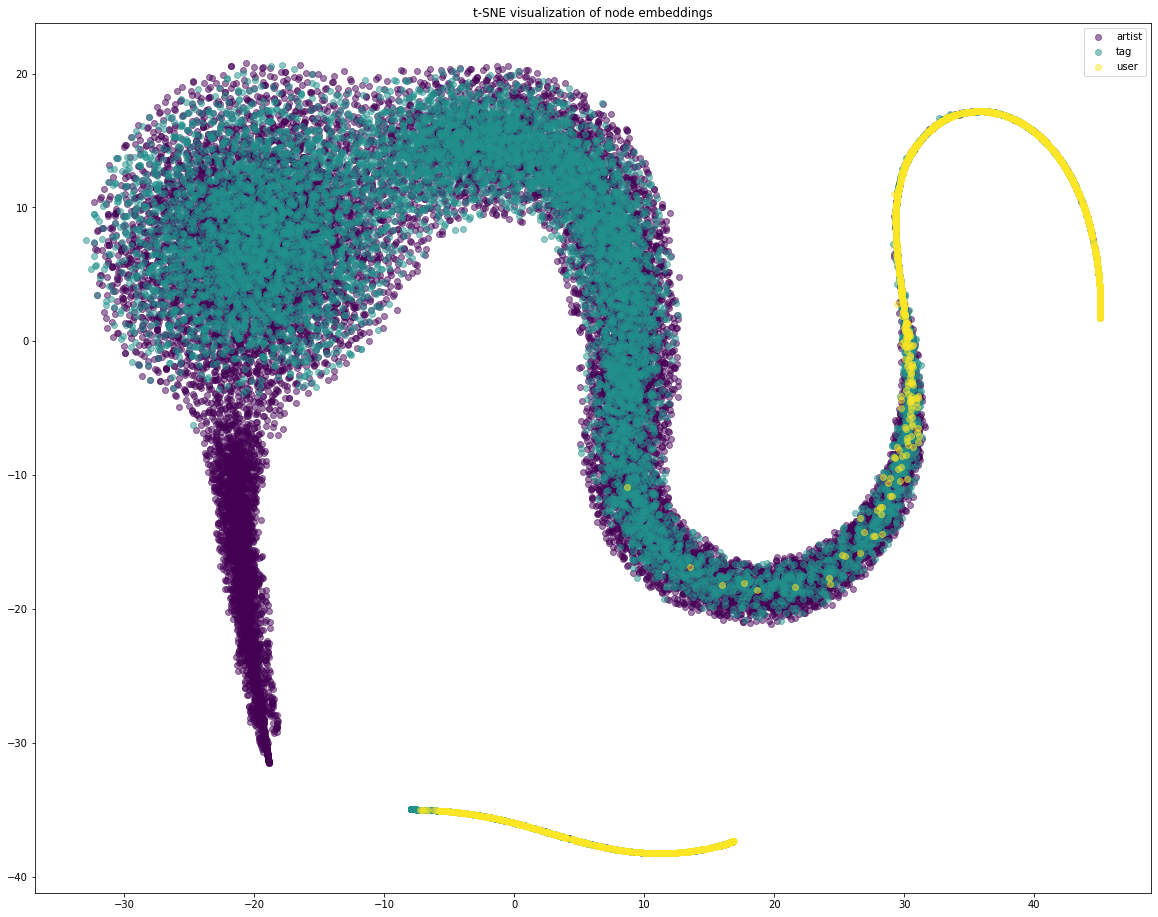

In [16]:

#Create a Color Map
unique_targets = np.unique(node_targets)
colors = plt.cm.get_cmap('viridis', len(unique_targets))  # You can choose different colormaps
label_map = {label: colors(i) for i, label in enumerate(unique_targets)}
node_colours = [label_map[target] for target in node_targets]

#Plotting
plt.figure(figsize=(20, 16))
for target in unique_targets:
    indices = [i for i, x in enumerate(node_targets) if x == target]
    plt.scatter(node_embeddings_2d[indices, 0], node_embeddings_2d[indices, 1], color=label_map[target], label=target, alpha=0.5)

plt.title("t-SNE visualization of node embeddings")
plt.legend(loc='best')  # Adjust the legend location as needed
plt.show()